In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv('API_19_DS2_en_csv_v2_5455435.csv')


In [3]:
data= df

In [4]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN,NaN
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Country Code    20216 non-null  object 
 2   Indicator Name  20216 non-null  object 
 3   Indicator Code  20216 non-null  object 
 4   1960            2494 non-null   float64
 5   1961            4089 non-null   float64
 6   1962            4123 non-null   float64
 7   1963            4139 non-null   float64
 8   1964            4180 non-null   float64
 9   1965            4211 non-null   float64
 10  1966            4217 non-null   float64
 11  1967            4222 non-null   float64
 12  1968            4233 non-null   float64
 13  1969            4239 non-null   float64
 14  1970            4784 non-null   float64
 15  1971            6127 non-null   float64
 16  1972            6143 non-null   float64
 17  1973            6146 non-null  

In [6]:
selected_columns = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
                    '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
                    '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
                    '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                    '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                    '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
                    '2020', '2021', '2022']


In [7]:
# Create a new DataFrame with the selected columns
X = data[selected_columns]

In [8]:
X.fillna(0, inplace=True)

<ipython-input-8-67b4599ed24c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [9]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

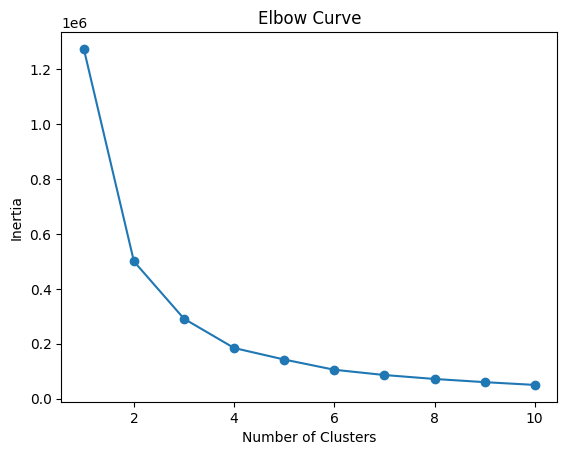

In [11]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [12]:
k = 4  # Choose the optimal number of clusters based on the elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_normalized)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


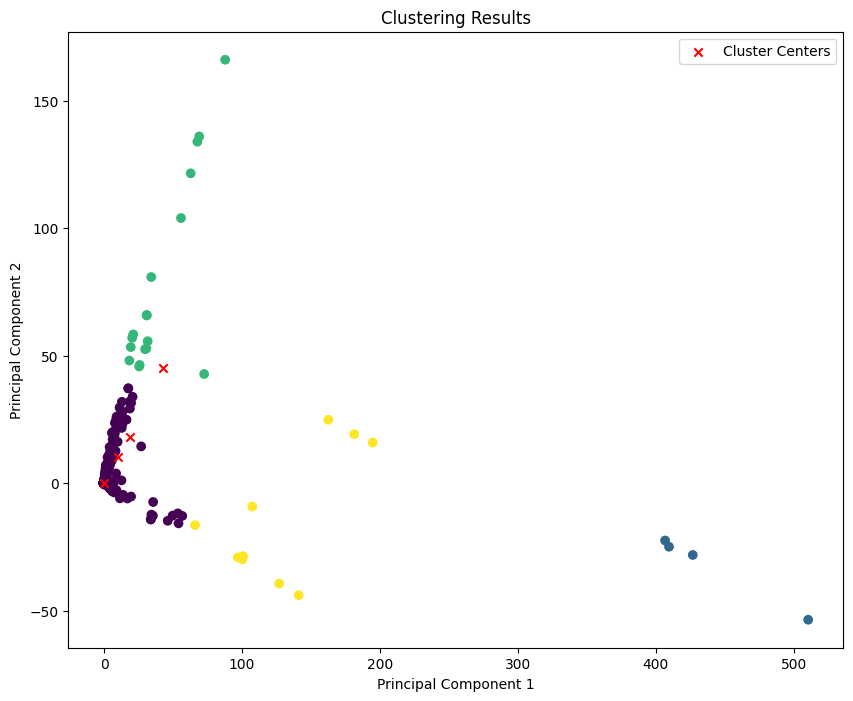

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.legend()
plt.show()

# **Exponential Smoothing**

In [14]:
Arab_World_data = data[(data['Country Name'] == 'Arab World') & (data['Indicator Name'] == 'CO2 emissions (kt)')]

In [15]:
selected_year = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [21]:
year = [str(year) for year in range(1990, 2020)]
Arab_World_data = Arab_World_data[year].values.flatten()

In [22]:
Arab_World_data

array([ 632434.47 ,  634609.889,  688901.78 ,  741737.04 ,  786080.84 ,
        810077.17 ,  838761.58 ,  879676.58 ,  884569.56 ,  896399.4  ,
        933754.74 ,  985326.85 , 1018866.88 , 1049656.31 , 1106155.3  ,
       1181610.3  , 1244545.85 , 1295588.9  , 1399901.26 , 1446949.8  ,
       1532866.   , 1565758.   , 1674052.5  , 1703920.29 , 1761731.57 ,
       1807587.05 , 1827972.85 , 1847736.22 , 1826262.12 , 1875283.52 ])

In [23]:
# Perform exponential smoothing
model = ExponentialSmoothing(Arab_World_data, trend='add', seasonal='add', seasonal_periods=4)
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [24]:
country = 'Arab World'

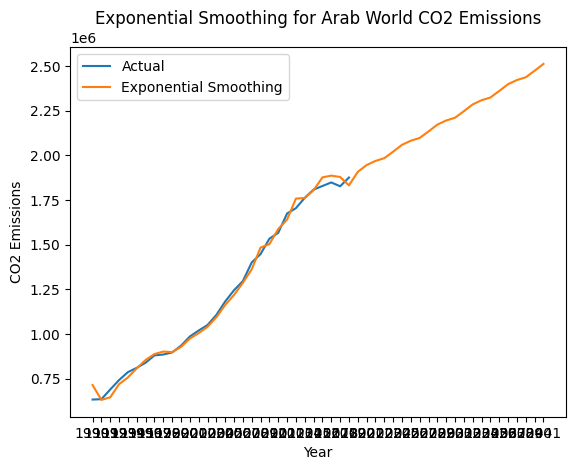

In [25]:
# Generate forecasts for years 2020-2041
forecast_years = [str(year) for year in range(2020, 2042)]
forecasts = fit_model.forecast(len(forecast_years))

# Plot the actual data, best fit curve, and forecasts
plt.plot(year, Arab_World_data, label='Actual')
plt.plot(year + forecast_years, fit_model.fittedvalues.tolist() + forecasts.tolist(), label='Exponential Smoothing')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title(f'Exponential Smoothing for {country} CO2 Emissions')
plt.legend()
plt.show()